In [1]:
clear()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

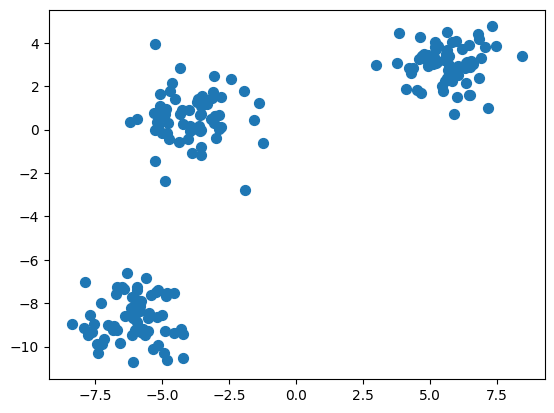

In [3]:
X, y_true, centers_true = make_blobs(n_samples=200, centers=3,
                       cluster_std=1, random_state=17, return_centers=True)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [5]:
km = KMeans(n_clusters=3)
km.fit(X)
y_kmeans = km.predict(X)

/Users/yinchuzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# estimated clustering
km.labels_

array([1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0,
       1, 0, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1,
       0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       1, 2, 1, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0,
       2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2,
       1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0,
       1, 0], dtype=int32)

In [7]:
# estimated cluster centers
km.cluster_centers_

array([[ 5.63559186,  3.0340282 ],
       [-6.07569755, -8.69581697],
       [-3.89771844,  0.57637002]])

In [8]:
# the true cluster centers
centers_true

array([[-4.10669995,  0.61173511],
       [-6.16958426, -8.64199284],
       [ 5.7397092 ,  3.12667044]])

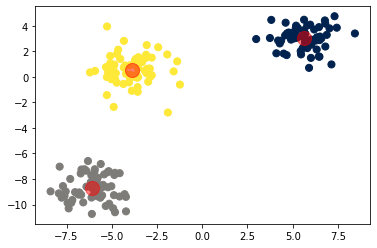

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cividis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

### What if the observations are not easily separated?

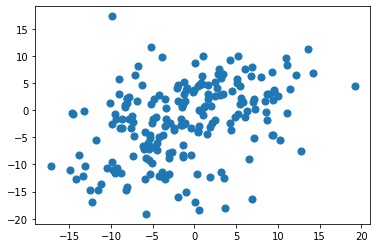

In [10]:
X, y_true, centers_true = make_blobs(n_samples=200, centers=3,
                       cluster_std=5, random_state=17, return_centers=True)
plt.scatter(X[:, 0], X[:, 1], s=50);

### What if we use the wrong number of clusters?

### How to choose the number of clusters?

In [11]:
# we look at the overall closeness for different choice of number of clusters
km.inertia_ 

397.34144907728046

### Do/Should we get random answers?

In [12]:
X, y_true, centers_true = make_blobs(n_samples=200, centers=3,
                       cluster_std=15, random_state=17, return_centers=True)

/Users/yinchuzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


44552.7642935835

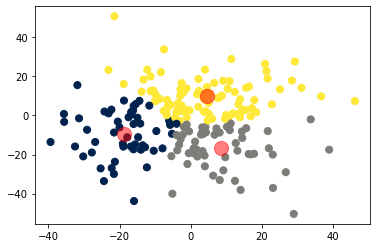

In [13]:
km = KMeans(n_clusters=3, random_state=24, init='random')
km.fit(X)
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='cividis');
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
km.inertia_ # this measures the overall closeness

In [14]:
# try a random starting point
km = KMeans(n_clusters=3, random_state=24, init='random')